## Objetivo

- Aprender a implementar o modelo $f_{w,b} (x)$ para regressão linear com uma variável

# Representação do modelo

## Ferramentas

Nesse código, você usará:
- NumPy, uma biblioteca popular para cálculos matriciais, etc
- Matplotlib, uma biblioteca popular para gerar figuras com dados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definição do Problema

Nesse código, você usará um exemplo de motivação baseado na previsão de tensão sobre um resistor.

Usaremos para isso um conjunto de dados com apenas 2 amostras - um valor de corrente de 0.2 A que resultou numa tensão de 21 V e um valor de 4.5 A que resultou numa tensão de 430 V. Essas duas amostras de dados contituem nosso *conjunto de dados de treinamento*.

| Corrente (A)     | Tensão (V) |
| -------------------| ------------------------ |
| 0.2               | 21                      |
| 4.5               | 430                      |

Queremos ajustar um modelo de regressão linear a partir desses dois pontos, para que seja possível então estimar a tensão sobre o resistor para outros valores de corrente.


Rodar a célula de código abaixo para criar as variáveis `x_train` e `y_train`. Os dados são armazenados em NumPy arrays de uma dimensão.

In [2]:
# x_train é a variável de entrada (corrente em Àmperes)
# y_train é a variável alvo (tensão em Volts)
x_train = np.array([0.2, 4.5])
y_train = np.array([21.0, 430.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [0.2 4.5]
y_train = [ 21. 430.]


### Número de amostras de treinamento `m`

Usaremos `m` para denotar o número de amostras de treinamento. Numpy arrays têm o parâmetro `.shape`. Nesse contexto, `x_train.shape` retorna uma tupla com uma entrada para cada dimensão. `x_train.shape[0]` é o comprimento da array (primeiro elemento presente na tupla), conforme mostrado abaixo.

In [3]:
# m é o número de amostras de treinamento
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"O número de amostras de treinamento é: {m}")

x_train.shape: (2,)
O número de amostras de treinamento é: 2


É possível também utilizar o função em Python `len()`, conforme abaixo.

In [4]:
m = len(x_train)
print(f"O número de amostras de treinamento é: {m}")

O número de amostras de treinamento é: 2


### Amostra de treinamento `x_i, y_i`

Usaremos (x$^{(i)}$, y$^{(i)}$) para denotar a $i-$ésima amostra de treinamento. Uma vez que a Linguagem Python tem 0 como índice inicial, (x$^{(0)}$, y$^{(0)}$) é (0.2, 21.0) e (x$^{(1)}$, y$^{(1)}$) é (4.5, 430.0).

A i-ésima posição da Numpy array `x_train` é acessada utilizando o comando `x_train[i]`, onde `i` denota a posição desejada.


Veja o código abaixo.

In [5]:
i = 0 # Mude esse valor para 1 para ver (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")
i = 1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (0.2, 21.0)
(x^(1), y^(1)) = (4.5, 430.0)


### Plotando os dados (gerando uma figura que mostra os dados)

Você pode plotar os dois pontos usando a função `scatter()` presente na biblioteca `matplotlib`, conforme mostrado abaixo.
- Os argumentos `marker` e `c` mostram os pontos como 'x' vermelhos (o padrão são pontos azuis).

Você pode usar outras funções da biblioteca `matplotlib` para definir o título e os rótulos dos eixos

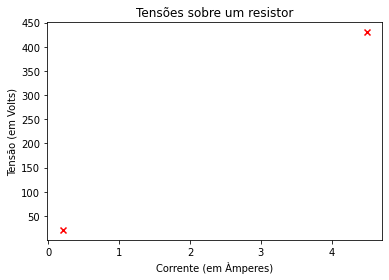

In [6]:
# Plotando os pontos dos dados
plt.scatter(x_train, y_train, marker='x', c='r')
# Ajustando o título:
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.show()

## Implementando um modelo

O modelo de função para regressão linear (que é a função que faz o mapeamento de `x` para `y`) é representado por

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

A fórmula acima nos mostra a equação da reta: diferentes valores para $w$ e $b$ levam a diferentes retas. <br/> <br/> <br/> <br/> <br/>


Vamos tentar ganhar mais intuição usando o código abaixo. Vamos começar com $w = 0$ e $b = 100$.

**OBS: Você pode retornar à célula abaixo para ajustar diferentes valores para os parâmetros w e b do modelo**

In [7]:
w = 0
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 0
b: 100


Agora, vamos computar o valor $f_{w,b}(x^{(i)})$ para os dois dados que temos. Você pode explicitamente escrever:

para $x^{(0)}$, `f_wb = w * x[0] + b`

para $x^{(1)}$, `f_wb = w * x[1] + b`

Para uma grande quantidade de dados, isso pode ser demasiadamente repetitivo. Ao invés disso, você pode usar um loop do tipo `for` conforme mostrado na função `calcula_saida_do_modelo` abaixo.
> **OBS**: O argumento `(ndarray (m,))` descreve uma Numpy array de n dimensões da forma (m,). `(scalar)` descreve um argumento sem dimensões, apenas uma magnitude.  
> **OBS**: `np.zero(n)` retorna uma numpy array de 1 dimensão com $n$ valores   


In [8]:
def calcula_saida_do_modelo(x, w, b):
    """
    Calcula a previsão para um modelo na forma de reta
    Argumentos da função:
      x (ndarray (m,)): Conjunto de dados com m amostras
      w,b (escalar)   : Parâmetros do modelo
    Retorna
      y (ndarray (m,)): Previsão de saída
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m): # estrutura 'for' em Python
        f_wb[i] = w * x[i] + b

    return f_wb

Agora vamos chamar a função `calcula_saida_do_modelo` e plotar o resultado

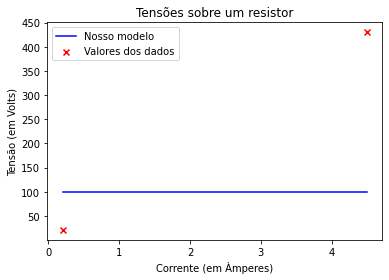

In [9]:
f_wb_calculado = calcula_saida_do_modelo(x_train, w, b,)

# Plotando a previsão feita pelo modelo
plt.plot(x_train, f_wb_calculado, c='b',label='Nosso modelo')

# Plotando os dados medidos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores dos dados')

# Definindo o título
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()


Como você pode ver, definindo $w = 0$ e $b = 100$ *não* resulta numa reta que se ajusta bem aos nossos dados.

### Desafio
Tente diferentes valores para $w$ e $b$. Quais seriam os melhores valores para esse conjunto de dados?

Qual seria uma possível interpretação física para o parâmetro $w$ nesse exemplo?


### Previsão

Agora que temos um modelo, podemos usá-lo para fazer uma previsão para um valor diferente de corrente. Vamos estimar a tensão para uma corrente de 2 A.


In [10]:
w = 100
b = 0
x_i = 2
tensao_para_2_amperes = w * x_i + b

print(f"{tensao_para_2_amperes:.0f} Volts")

200 Volts


# Parabéns!

Com este código, você aprendeu:
 - Que a Regressão Linear constrói um modelo que estabelece uma relação entre as características de entrada e a variável alvo de saída
     - No exemplo, a característica de entrada era a corrente e a variável alvo era a tensão sobre o resistor
     - Para uma simples regressão linear, o modelo tem dois parâmetros $w$ e $b$ cujos valores são ajustados usando um conjunto de dados de treinamento.
     - Uma vez que os parâmetros do modelo foram determinados, o modelo pode ser usado para fazer previsões (estimativas) para novos dados que ainda não haviam sido utilizados anteriormente

## Resposta ao Desafio
### Tente diferentes valores para $w$ e $b$. Quais seriam os melhores valores para esse conjunto de dados?

- são só 2 pontos, vamos tentar regredir montando um sistema de equações
- sabe-se que:
    - $f(x_0)$ = $y_0$
    - $f(x_1)$ = $y_1$
- Assumindo regressão linear, tem-se:
$$
\begin{cases}
w \cdot x_0 + b = y_0 \\
w \cdot x_1 + b = y_1
\end{cases}
$$

Resolvendo para $w$ e $b$, obtém-se:

$$
\begin{cases}
w = \frac{y_1 - y_0}{x_1 - x_0} \\
b = y_0 - w \cdot x_0
\end{cases}
$$

Ou ainda:

$$
\begin{cases}
w = \frac{y_1 - y_0}{x_1 - x_0} \\
b = y_1 - w \cdot x_1
\end{cases}
$$

### Calculando os valores melhorados de $w$ e $b$

In [11]:
w = (y_train[1]  - y_train[0]) / (x_train[1] - x_train[0])
b = y_train[0] - w * x_train[0]
b_alt = y_train[1] - w * x_train[1]
print(f"w: {w:.04f}")
print(f"b: {b:.04f}")
print(f"b(alternativo): {b_alt:.04f}")


w: 95.1163
b: 1.9767
b(alternativo): 1.9767


### Computando os valores da reta resultante com os valores melhorados de $w$ e $b$

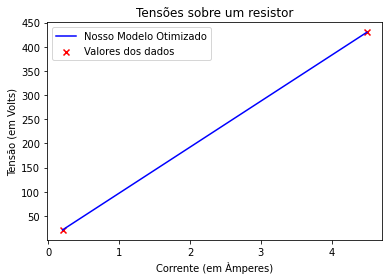

In [12]:
f_wb_calculado = calcula_saida_do_modelo(x_train, w, b,)

# Plotando a previsão feita pelo modelo
plt.plot(x_train, f_wb_calculado, c='b',label='Nosso Modelo Otimizado')

# Plotando os dados medidos
plt.scatter(x_train, y_train, marker='x', c='r',label='Valores dos dados')

# Definindo o título
plt.title("Tensões sobre um resistor")
# Ajustando o rótulo do eixo y
plt.ylabel('Tensão (em Volts)')
# Ajustando o rótulo do eixo x
plt.xlabel('Corrente (em Àmperes)')
plt.legend()
plt.show()

### Previsão com o modelo melhorado

In [13]:
x_i = 2
tensao_para_2_amperes = w * x_i + b

print(f"{tensao_para_2_amperes:.02f} Volts")

192.21 Volts


### Qual seria uma possível interpretação física para o parâmetro $w$ nesse exemplo?
No sistema descrito pela equação $V=w \cdot I+b$, $w$ geralmente é associado à resistência elétrica, especialmente em uma relação linear entre tensão e corrente. A função $V=w \cdot I+b$ é uma função afim, devido ao intercepto $b$ não nulo, o que não descarta $w$ de ser uma resistência pura, se considerarmos efeitos como descalibração do equipamento ou a presença de múltiplos elementos em um circuito mais complexo. No entanto, $w$ é consistente com a interpretação de resistência elétrica, ainda que considerando possíveis variações do sistema testado e calibração de equipamentos.

A equação dada é:

$V = w \cdot I + b$

Onde:
-  $V$ é a tensão.
-  $I$ é a corrente.
-  $w$ é o coeficiente angular ou a taxa de inclinação da reta.
-  $b$ é um termo constante.

#### Análise Dimensional

1. **Dimensões da Tensão ($V$)**:
   - A unidade de tensão é o Volt ($V$).
   - Em termos dimensionais: 

     $[V] = M \cdot L^2 \cdot T^{-3} \cdot I^{-1}$

     onde:
     - $M$ é a massa,
     - $L$ é o comprimento,
     - $T$ é o tempo,
     - $I$ é a corrente elétrica.

2. **Dimensões da Corrente ($I$)**:
   - A unidade de corrente é o Àmpere (A).
   - Em termos dimensionais: 

     $[I] = I$
     Sendo $I$ a corrente elétrica (Pelo que eu saiba, unidade fundamental do S.I).

3. **Dimensões do Coeficiente Angular ($w$)**:
   - A equação $V = w \cdot I$ indica que $w$ deve ter dimensões que, multiplicadas pela corrente, resultem na dimensão de tensão.
   - Em termos dimensionais:

     $[w] = \frac{[V]}{[I]} = \frac{M \cdot L^2 T^{-3} \cdot I^{-1}}{I} = M \cdot L^2 \cdot T^{-3} \cdot I^{-2}$

   - Essa dimensão corresponde à resistência elétrica, medida em ohms ($\Omega$).

4. **Dimensões do Termo Constante ($b$)**:
   - Como $b$ é somado diretamente à tensão $V$, suas dimensões devem ser as mesmas que as da tensão.
   - Dimensionalmente: 

     $[b] = [V] = M \cdot L^2 \cdot T^{-3} \cdot I^{-1}$
5. **Análise Dimensional de $V = w \cdot I + b$**:
   - Basta demonstrar que toros os termos resultam em uma equação dimensionalmente homogênea:
     
     $M \cdot L^2 \cdot T^{-3} \cdot I^{-1} = M \cdot L^2 \cdot T^{-3} \cdot I^{-2} \cdot I + M \cdot L^2 \cdot T^{-3} \cdot I^{-1} = M \cdot L^2 \cdot T^{-3} \cdot I^{-1}$
     
     $M \cdot L^2 \cdot T^{-3} \cdot I^{-1} = M \cdot L^2 \cdot T^{-3} \cdot I^{-1}$

   - Logo, é uma equação dimensional homogênea e, portanto, tem interpretação física, onde:
       - $w$ tem dimensional de resistência elétrica ($\Omega$)
       - $b$ tem dimensional de tensão elétrica ($V$)
       - $I$ tem dimensional de corrente elétrica ($I$)
       - $V$ tem dimensional de tensão elétrica ($V$) 
   
       
